# Singular Value Decomposition (SVD)



Most of this [code](http://www.frankcleary.com/svdimage/) has been repackaged as a function.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

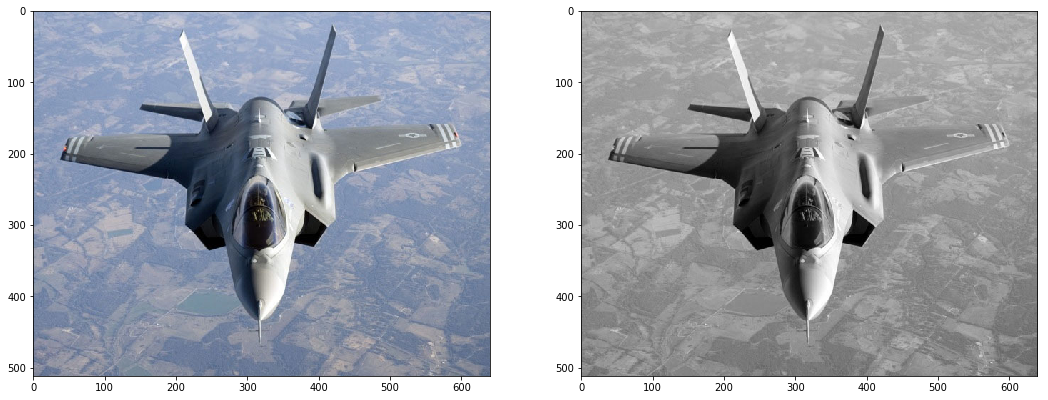

In [2]:
# Read image and convert to grayscale
img = Image.open('/Users/davidziganto/images/f35.jpg')
imggray = img.convert('LA')

fig = plt.figure(figsize=(18, 12)) ## Figure object
ax1 = fig.add_subplot(1, 2, 1) 
ax2 = fig.add_subplot(1, 2, 2)
ax1.imshow(img)
ax2.imshow(imggray);

In [3]:
def image_to_svd_components(path, num_comps=5):
    '''
    Takes a jpeg image and outputs an image with the number of specified components.
    
    Parameters
    ----------
    path: string
        path where jpeg image is located
    
    num_comps: int, optional, default: 5 
        number of svd components to include
    
    Returns
    ----------
    image
    '''
    
    # get image and convert to grayscale
    img = Image.open(path)
    imggray = img.convert('LA')
    
    # convert to numpy array
    imgmat = np.array(list(img.getdata(band=0)), float)
    imgmat.shape = (img.size[1], img.size[0])
    imgmat = np.matrix(imgmat)
    
    U, sigma, V = np.linalg.svd(imgmat)
    
    reconst_img = np.matrix(U[:, :num_comps]) * np.diag(sigma[:num_comps]) * np.matrix(V[:num_comps, :])

    return plt.imshow(reconst_img, cmap='gray')

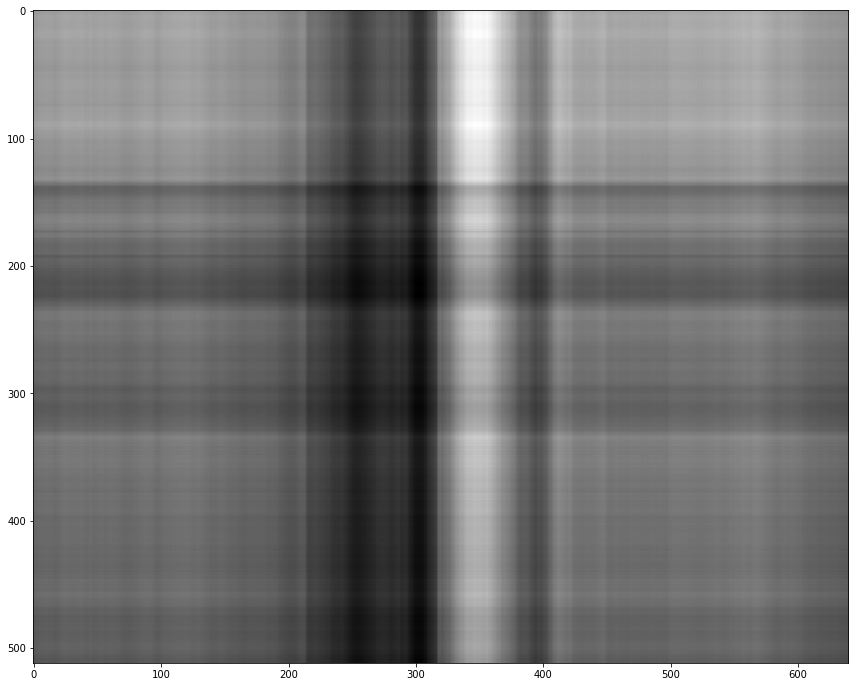

In [4]:
# 1 Components
plt.figure(figsize=(18, 12))
image_to_svd_components('/Users/davidziganto/images/f35.jpg', 1);

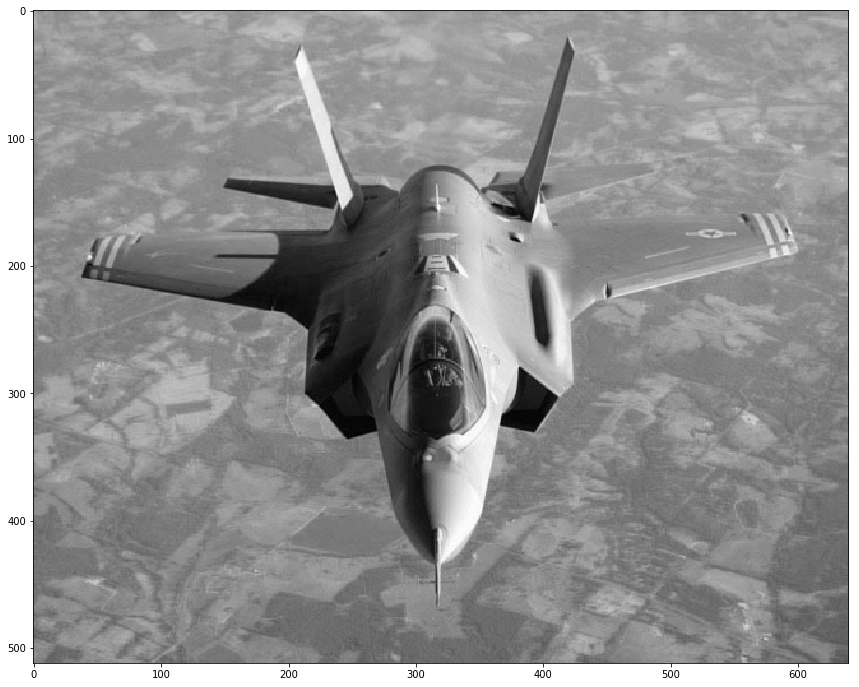

In [15]:
# 10 Components
plt.figure(figsize=(18, 12))
image_to_svd_components('/Users/davidziganto/images/f35.jpg', 200);

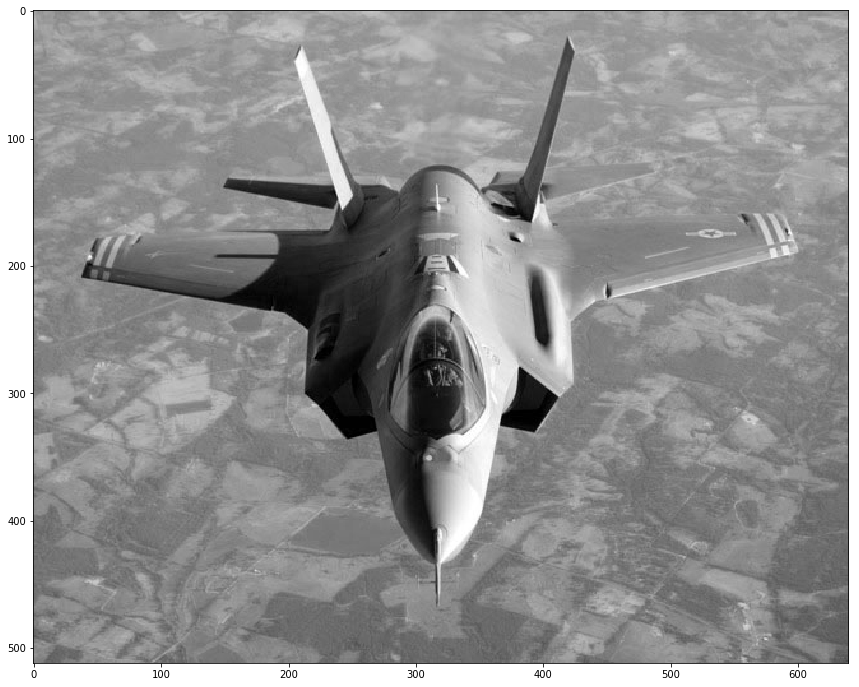

In [10]:
# All 512 Components
plt.figure(figsize=(18, 12))
image_to_svd_components('/Users/davidziganto/images/f35.jpg', 512);